In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Chap 7. 회귀분석
## 7-1 단순회귀분석
- 변수간의 관계를 나타내는 선형회귀식을 도출하여 변수 간 연관성을 분석
- 최소자승법 : 산점도 상의 관측된 각 좌표점과 임의의 직선 사이의 수직거리를 제곱하여 합한 값이 가장 작게 되는 직선을 찾는 방법

In [3]:
prestige = pd.read_csv("data/Prestige.csv")
ols = smf.ols(data=prestige, formula="income ~ education").fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     50.06
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           2.08e-10
Time:                        09:57:22   Log-Likelihood:                -975.61
No. Observations:                 102   AIC:                             1955.
Df Residuals:                     100   BIC:                             1960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2853.5856   1407.039     -2.028      0.045   -5645.111     -62.060
education    898.8128    127.035      7.075      0.000     646.778    1150.847
==============================================================================
Omnibus:                       61.134   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.196
Skew:                           1.950   Prob(JB):                     1.77e-65
Kurtosis:                      10.413   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

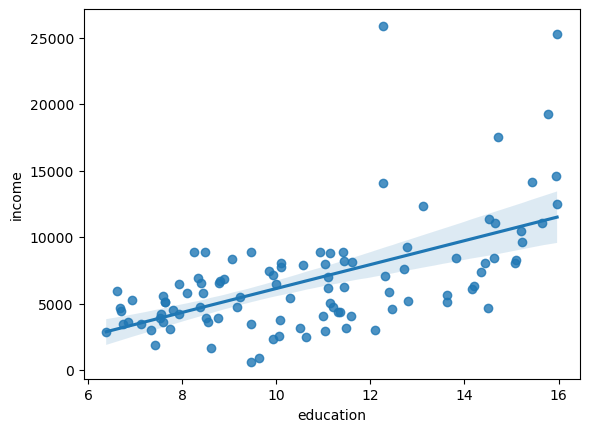

In [4]:
sns.regplot(data=prestige, x='education', y='income');

In [5]:
from statsmodels.stats.anova import anova_lm

anova_table = anova_lm(ols)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
education,1.0,6.074214e+08,6.074214e+08,50.059781,2.079192e-10
Residual,100.0,1.213392e+09,1.213392e+07,NaN,NaN


In [6]:
anova_table.loc['education', 'PR(>F)']

2.0791924104981652e-10

In [7]:
ols.resid

0       3421.149226
1      17713.140142
2        646.745592
3       1454.142929
4      -1884.058165
           ...     
97      1602.584241
98       -50.000253
99        83.522096
100      327.457164
101    -1214.264215
Length: 102, dtype: float64

In [8]:
new_data = pd.DataFrame([5,10,15]).rename(columns={0:'education'})
ols.predict(exog=new_data)

0     1640.478627
1     6134.542836
2    10628.607045
dtype: float64

## 7-2 다항회귀분석
- 독립변수의 n차 다항식 : 추세선을 그릴 경우 (n-1)개의 굴절이 관찰되면 n차 다항식으로 모델링

In [9]:
smf.ols(formula = 'income ~ education + I(education ** 2)', data=prestige).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     30.73
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           4.15e-11
Time:                        09:57:23   Log-Likelihood:                -971.68
No. Observations:                 102   AIC:                             1949.
Df Residuals:                      99   BIC:                             1957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.292e+04   5762.270      2.242      0.027    1484.640    2.44e+04
education         -2102.9012   1072.727     -1.960      0.053   -4231.425      25.623
I(education ** 2)   134.1793     47.636      2.817      0.006      39.658     228.700
==============================================================================
Omnibus:                       69.815   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.122
Skew:                           2.188   Prob(JB):                     8.89e-95
Kurtosis:                      12.098   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
faith = pd.read_csv("data/faithful.csv")[['eruptions', 'waiting']]
faith.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


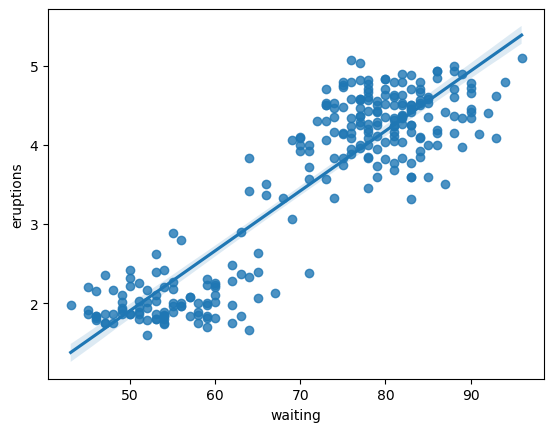

In [11]:
sns.regplot(data=faith, x='waiting', y='eruptions');

In [12]:
smf.ols(formula = 'eruptions ~ waiting + I(waiting**2) + I(waiting**3)', data=faith).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     566.0
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          1.30e-115
Time:                        09:57:23   Log-Likelihood:                -150.40
No. Observations:                 272   AIC:                             308.8
Df Residuals:                     268   BIC:                             323.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.6258      3.722      8.229      0.000      23.299      37.953
waiting            -1.4381      0.167     -8.601      0.000      -1.767      -1.109
I(waiting ** 2)     0.0229      0.002      9.346      0.000       0.018       0.028
I(waiting ** 3)    -0.0001   1.18e-05     -9.593      0.000      -0.000   -8.96e-05
==============================================================================
Omnibus:                        2.196   Durbin-Watson:                   2.425
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.921
Skew:                          -0.130   Prob(JB):                        0.383
Kurtosis:                       3.319   Cond. No.                     6.38e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 7-3 다중회귀분석
### 다중회귀분석
- 두 개 이상의 연속형 독립변수를 이용하여 한 개의 연속형 종속변수 예측
- 회귀계수는 다른 변수의 영향을 받음
- 회귀계수의 절대적 크기는 단위에 영향을 받으므로 단순히 예측력을 판단하는 것은 오류 발생 가능 => 표준회귀계수 베타 이용가능

In [3]:
cars = pd.read_csv("../data/kwak/mtcars.csv")
cars.head()

,rownames,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


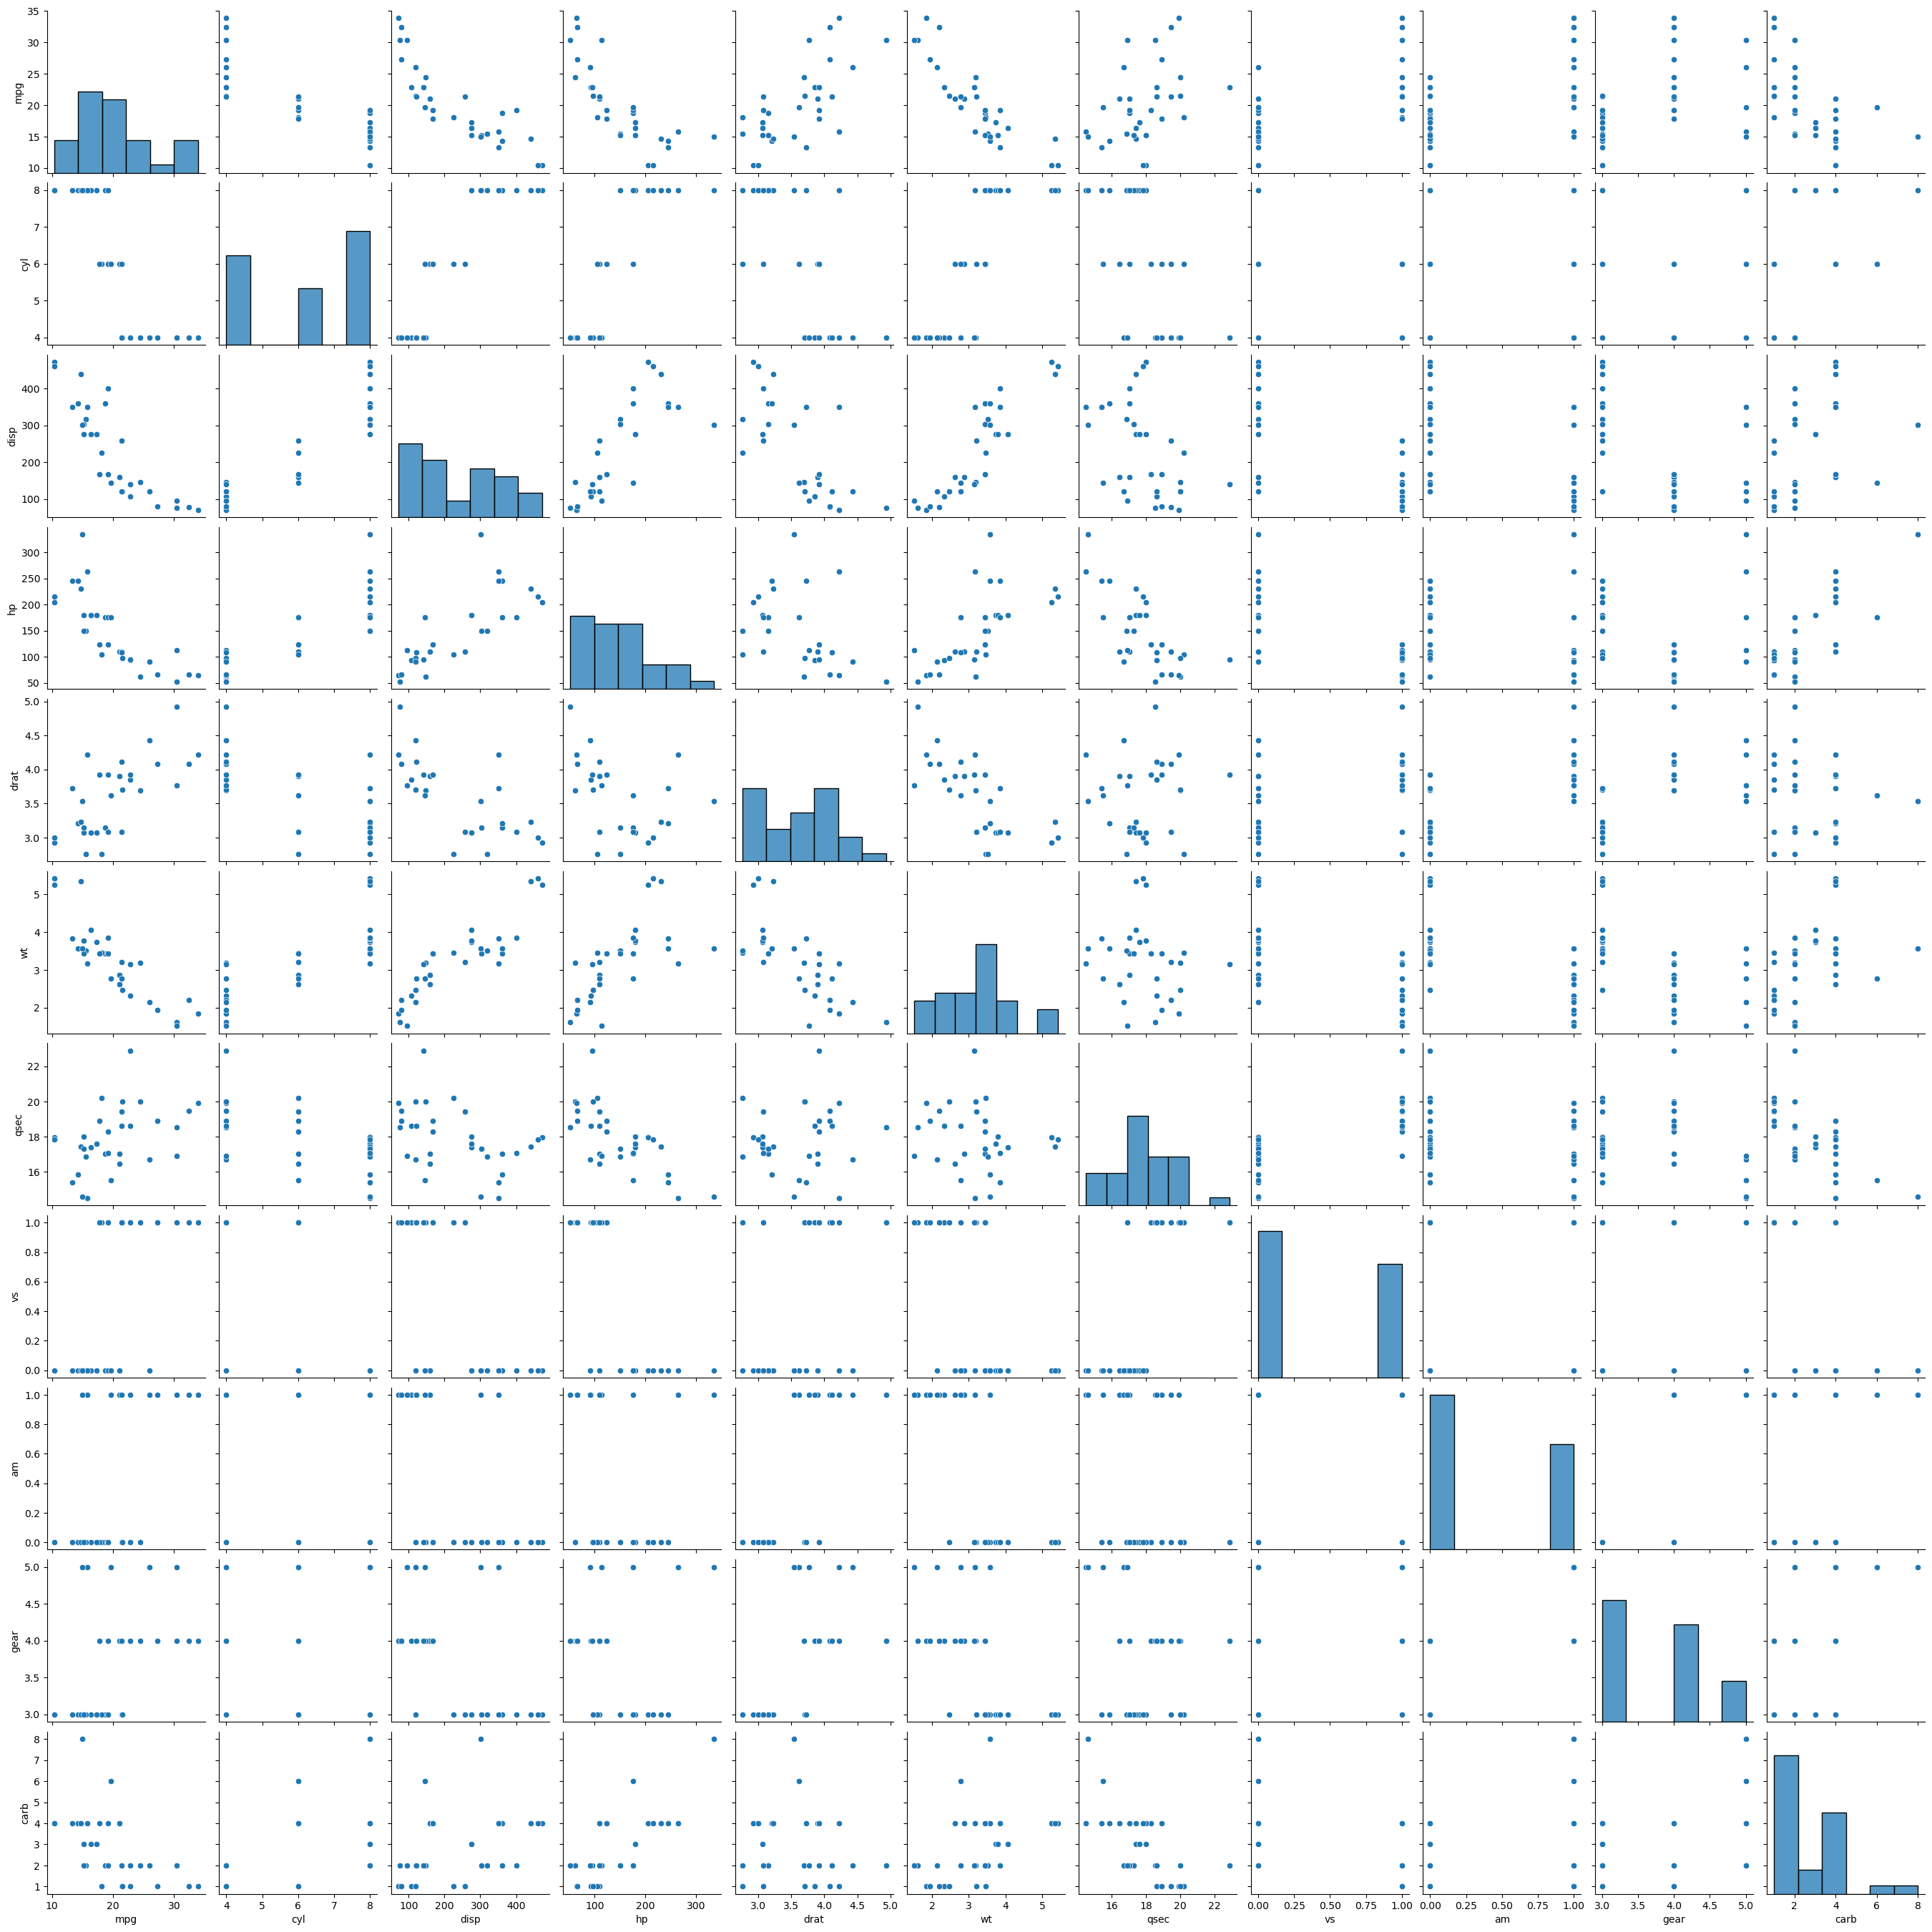

In [14]:
sns.pairplot(cars);

In [4]:
cars.drop(columns='rownames',axis=1).corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [5]:
smf.ols(data=cars, formula="mpg ~ hp + wt + disp + drat").fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           2.70e-10
Time:                        22:46:44   Log-Likelihood:                -73.292
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      27   BIC:                             163.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1487      6.294      4.631      0.000      16.235      42.062
hp            -0.0348      0.012     -2.999      0.006      -0.059      -0.011
wt            -3.4797      1.078     -3.227      0.003      -5.692      -1.267
disp           0.0038      0.011      0.353      0.727      -0.018       0.026
drat           1.7680      1.320      1.340      0.192      -0.940       4.476
==============================================================================
Omnibus:                        5.267   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.327
Skew:                           0.899   Prob(JB):                        0.115
Kurtosis:                       3.102   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# 표준화 회귀계수
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
cars_ss = pd.DataFrame(ss.fit_transform(cars[['mpg', 'hp', 'wt', 'disp', 'drat']]), columns=['mpg', 'hp', 'wt', 'disp', 'drat'])

smf.ols(data=cars_ss, formula="mpg ~ hp + wt + disp + drat").fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           2.70e-10
Time:                        22:46:44   Log-Likelihood:                -16.320
No. Observations:                  32   AIC:                             42.64
Df Residuals:                      27   BIC:                             49.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.343e-16      0.078  -6.89e-15      1.000      -0.159       0.159
hp            -0.3957      0.132     -2.999      0.006      -0.666      -0.125
wt            -0.5649      0.175     -3.227      0.003      -0.924      -0.206
disp           0.0785      0.222      0.353      0.727      -0.377       0.534
drat           0.1569      0.117      1.340      0.192      -0.083       0.397
==============================================================================
Omnibus:                        5.267   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.327
Skew:                           0.899   Prob(JB):                        0.115
Kurtosis:                       3.102   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 회귀분석 가정 진단
1. 회귀분석 가정
- 선형성 : 종속변수와 독립변수 간의 관계는 선형
- 정규성 : 독립변수 값에 대해 대응되는 종속변수값들의 분포는 정규분포
- 등분산성 : 독립변수값에 대해 대응되는 종속변수값들의 분포는 모두 동일한 분산
- 독립성 : 하나의 관측값은 다른 관측값에 영향을 미치지 않는다
- 다중공선성 : 독립변수 간 선형 관계 (4, 10 분기점)

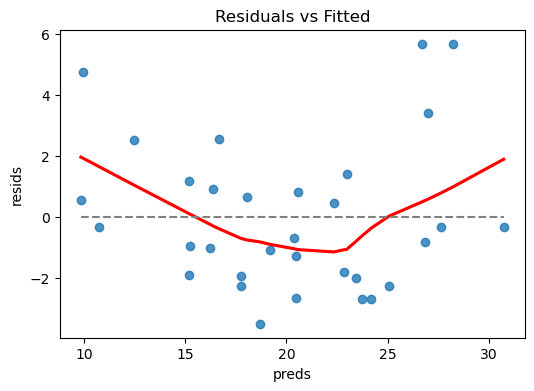

In [7]:
# 선형성 resid vs fitted => 잔차와 예측값 사이에는 어떠한 체계적 관계도, 예측가능한 패턴도 존재하지 않는다
## 모델에 의해서 설명이 되지 않는 무작위적인 오차만 남아야 함
## 정규분포를 가정했으므로, 잔차의 평균은 0, 분산은 일정해야 함
cols = ['hp', 'wt', 'disp', 'drat']
result = smf.ols(data=cars, formula="mpg ~ hp + wt + disp + drat").fit()

fitted = result.fittedvalues
residual = result.resid

fig, ax = plt.subplots(1,1, figsize=(6,4))
sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'}, ax=ax);
ax.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey');
ax.set_title('Residuals vs Fitted');
ax.set_xlabel("preds");
ax.set_ylabel("resids");

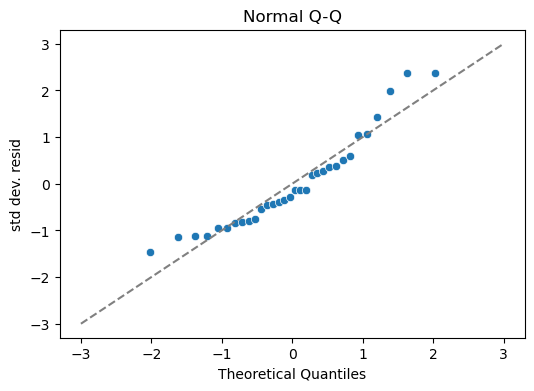

In [8]:
# 정규성 normal Q-Q
sr = stats.zscore(residual)
(x, y), _ = stats.probplot(sr)

fig, ax = plt.subplots(1,1, figsize=(6,4));
sns.scatterplot(x=x, y=y, ax=ax);
ax.plot([-3, 3], [-3, 3], '--', color='grey');
ax.set_title("Normal Q-Q");
ax.set_xlabel("Theoretical Quantiles");
ax.set_ylabel("std dev. resid");

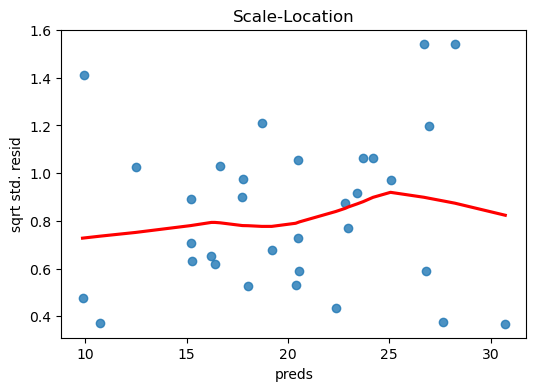

In [9]:
# 등분산성 scale-location
## 직선의 기울기가 0으로 가야함
ss_resid = StandardScaler().fit_transform(np.array(residual).reshape(-1,1))

fig, ax = plt.subplots(1,1, figsize=(6,4));
sns.regplot(x=fitted, y=np.sqrt(abs(ss_resid)), lowess=True, line_kws={'color': 'red'}, ax=ax);
# sns.scatterplot(x=fitted, y=ss_resid, ax=ax);
ax.set_title("Scale-Location");
ax.set_xlabel("preds");
ax.set_ylabel("sqrt std. resid");

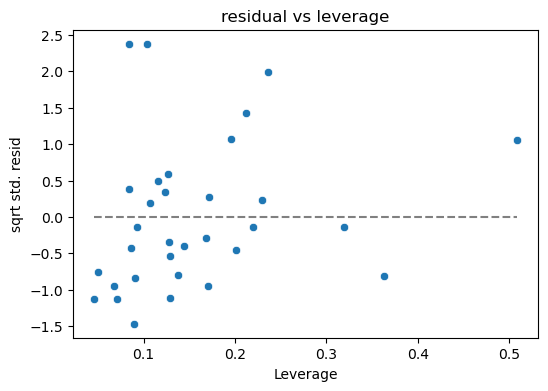

In [10]:
# residual vs leverage(각 관측치의 영향력)
## 이상치와 영향점 식별
leverage = result.get_influence().hat_matrix_diag

fig, ax = plt.subplots(1,1, figsize=(6,4))
sns.scatterplot(x=leverage, y=ss_resid.flatten(), ax=ax);
ax.plot([leverage.min(), leverage.max()], [0, 0], '--', color='grey');
ax.set_title("residual vs leverage");
ax.set_xlabel("Leverage");
ax.set_ylabel("sqrt std. resid");

In [11]:
# 독립성 : 관측자의 expertise에 의존

In [12]:
# 다중공선성 : 독립변수 간의 선형관계(표준화한 독립변수 이용)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(x):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['feature'] = x.columns

    return vif[['feature', 'VIF']]
    
vif = get_vif(cars_ss[cols])  # 표준화
display(vif)

,feature,VIF
0,hp,2.894373
1,wt,5.096601
2,disp,8.209402
3,drat,2.279547


### 회귀모델 수정
- 관측값 제거, 변수 변환, 변수 추가/제거를 통해 회귀모델 수정
- 이상점(outlier) / 영향점(influential point) => 관측값 제거
- 선형성, 정규성, 등분산성 가정 미충족 => 변수 변환
  - 선형성 위반 시 독립변수 변환
  - 정규/등분산성 위배 시 종속변수 변환
    $ x^{\lambda} , 0.5단위\ 가까운\ 수$
- 다중공선성 : 변수 제거 => 예측이 주요 목적이라면 다중공선성은 큰 문제가 되지 않으나 통계적 해석이 문제라면 해결을 해야 함
- 비정상적인 관측값은 제거하나, 정상적인 방법하에 만들어진 이상치는 유지

In [13]:
# 선형성 개선을 위한 변환을 위한 lambda 찾기
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(np.array(cars['mpg']).reshape(-1, 1))
pt.lambdas_ # 가까운 정수 사용 => 0이면 별로 필요없을 수도

array([-0.02122677])

In [14]:
# 정규성을 개선하기 위한 종속변수 변환
## => boxTidwell test

In [15]:
# 등분산성을 개선하기 위한 종속변수 변환
## => Spread-Level Plot

### 회귀모델 선택
- 예측도(predictive acc., 모델의 데이터 적합도)와 간명도(parsimony, 모델의 간결함과 재현성)

In [16]:
# 두 모델의 설명력 ANOVA 비교 => 변수 증가에 비해 설명력의 증가가 미미하다면 불필요
## 'H0' : 설명변수 추가로 인한 설명력의 개선량이 0이다
## 중첩된 모델 간에만 비교 가능
from statsmodels.stats.anova import anova_lm

result1 = smf.ols(data=cars, formula = 'mpg ~ hp + wt').fit()
result2 = smf.ols(data=cars, formula = "mpg ~ hp + wt + disp + drat").fit()

display(anova_lm(result1, result2))

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,29.0,195.047755,0.0,NaN,NaN,NaN
1,27.0,182.837565,2.0,12.21019,0.901552,0.417812


In [17]:
# AIC 비교 : 작으면 더 좋음
print(result1.aic, result2.aic)

154.6523388256413 156.58365757609903


### 변수 선택
- 전진선택법
- 후진제거법
- 단계선택법

In [137]:
import time
import itertools

def process_subset(X,y, feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    AIC = regr.aic # 모델의 AIC
    return {"model":regr, "AIC":AIC, "features": feature_set}
        
def forward(X, y, predictors):
    '''
    전진선택법
    '''
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(X=X, y= y, feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:', best_model['AIC'] )

    return best_model

def backward(X,y,predictors):
    '''
    후진소거법
    '''
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(process_subset(X=X, y= y,feature_set=list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:', best_model['AIC'])
#     print(best_model)
    
    return best_model



def stepwise_model(X,y):
    '''
    단계적 선택법
    '''
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = process_subset(X,y,predictors+['Intercept'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['Intercept'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('\nForward!!')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'Intercept']
            print('\nBackward!!')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [138]:
from patsy import dmatrices

y, X = dmatrices("mpg ~ hp + wt + disp+ drat", data = cars,return_type = "dataframe")
stepwise_best_model = stepwise_model(X=X, y=y)

Processed  4 models on 1 predictors in
Selected predictors: ['wt', 'Intercept']  AIC: 164.0294289918762

Forward!!
Processed  1 models on 0 predictors in 0.002811908721923828
Selected predictors: ['Intercept']  AIC: 206.75551611599292
Processed  3 models on 2 predictors in
Selected predictors: ['wt', 'hp', 'Intercept']  AIC: 154.65233882564132

Forward!!
Processed  2 models on 1 predictors in 0.0038499832153320312
Selected predictors: ['wt', 'Intercept']  AIC: 164.0294289918762
Processed  2 models on 3 predictors in
Selected predictors: ['wt', 'hp', 'drat', 'Intercept']  AIC: 154.7310895483452

Forward!!
Processed  3 models on 2 predictors in 0.00484013557434082
Selected predictors: ['wt', 'hp', 'Intercept']  AIC: 154.65233882564132

Backward!!
Processed  2 models on 3 predictors in
Selected predictors: ['wt', 'hp', 'drat', 'Intercept']  AIC: 154.7310895483452

Forward!!
Processed  3 models on 2 predictors in 0.005015134811401367
Selected predictors: ['wt', 'hp', 'Intercept']  AIC: 154

In [143]:
# 가장 AIC가 낮은 모델 결과 출력
stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           9.11e-12
Time:                        06:42:36   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 더미변수를 이용한 회귀분석
- 독립변수가 범주형 변수일 경우 변환하여 회귀분석 수행
    - 1로 코팅된 범주가 종속변수에 미치는 영향 
    - 각 회귀계수는 각 더미변수에 대응되는 범주와 기준범주 간의 종속변수 평균의 차이

In [145]:
insect = pd.read_csv("../data/kwak/InsectSprays.csv", index_col='rownames')
insect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [146]:
insect.groupby('spray').mean()

,count
spray,
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667
